In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_bert = pd.read_csv("df_carox_bert.csv")

In [6]:
df_bert

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..CaryophylleneOxide
0,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.0
1,4,0.153703,0.129806,0.573836,0.061781,0.029730,-0.393227,0.782153,0.130317,-0.070932,...,0.114314,0.094989,-0.120709,0.243385,-0.737614,0.100473,-0.767890,-0.144897,-0.775545,0.0
2,4,0.153703,0.129806,0.573836,0.061781,0.029730,-0.393227,0.782153,0.130317,-0.070932,...,0.114314,0.094989,-0.120709,0.243385,-0.737614,0.100473,-0.767890,-0.144897,-0.775545,0.0
3,5,0.124309,0.161562,0.573033,-0.019954,0.059185,-0.295751,0.495331,0.220471,-0.019156,...,0.135187,0.180882,-0.089732,0.199170,-0.706113,-0.035785,-0.544304,-0.166163,-0.541058,0.0
4,7,0.035710,0.201637,0.594890,0.030520,0.127054,-0.244745,0.298687,0.301295,0.103147,...,0.006037,0.187179,0.035906,0.119722,-0.590700,-0.152532,-0.557452,-0.110804,-0.395861,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42971,0.219584,0.143236,0.539909,0.086895,-0.006281,-0.389946,0.806679,0.186327,-0.065521,...,0.142024,0.141072,-0.212327,0.300115,-0.697690,0.069458,-0.770859,-0.155446,-0.747328,0.0
59996,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.0
59997,42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,...,0.195909,0.095593,-0.109210,0.319783,-0.766471,0.119461,-0.819312,-0.167582,-0.830700,0.0
59998,42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,...,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053,0.0


In [7]:
df_bert.columns.to_list()

['index',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_

In [8]:
X = df_bert.drop(['X..CaryophylleneOxide', 'index'], axis = 1)
y = df_bert[['X..CaryophylleneOxide']]

<AxesSubplot:ylabel='Count'>

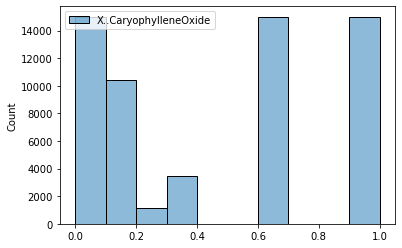

In [9]:
sns.histplot(y, bins = 10)

PCA

In [10]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [11]:
pca_comps

array([[ 1.97068624e+00, -6.92954651e-01,  9.87405663e-02, ...,
        -4.60007523e-03, -1.01889921e-02,  2.89653245e-09],
       [-6.41178673e-01, -1.70065704e-01, -4.27697221e-02, ...,
        -4.94398575e-03, -1.31431571e-03, -4.42560607e-08],
       [-6.41178673e-01, -1.70065704e-01, -4.27697221e-02, ...,
        -4.94398575e-03, -1.31431571e-03, -4.42560629e-08],
       ...,
       [-1.84251871e+00,  4.44364922e-01, -2.60309830e-01, ...,
         3.14144965e-03, -1.01171276e-03, -3.33781624e-08],
       [-4.78942803e-01, -3.59589409e-01, -6.67310153e-02, ...,
         1.08460683e-03,  2.88430546e-06, -3.56136787e-08],
       [-4.78942803e-01, -3.59589409e-01, -6.67310153e-02, ...,
         1.08460683e-03,  2.88430546e-06, -3.56136787e-08]])

In [12]:
type(pca_comps)

numpy.ndarray

In [13]:
explained_variance = pca.explained_variance_ratio_

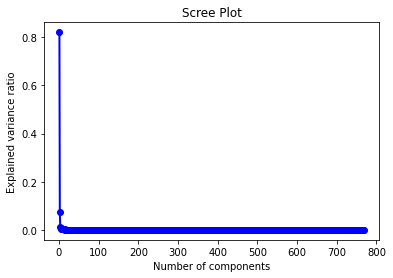

In [14]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [15]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [16]:
n_components_optimal

1

In [17]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [18]:
X_reduced

array([[ 1.97068624],
       [-0.64117867],
       [-0.64117867],
       ...,
       [-1.84251871],
       [-0.4789428 ],
       [-0.4789428 ]])

In [19]:
X_reduced = pd.DataFrame(X_reduced)
X_reduced = X_reduced.add_prefix('pca_')
X_reduced

,pca_0
0,1.970686
1,-0.641179
2,-0.641179
3,3.304144
4,5.717869
...,...
59995,-0.968128
59996,1.312734
59997,-1.842519
59998,-0.478943


train test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [21]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

kNN (before feature selection and hyperparameter tuning)

In [22]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [23]:
mean_absolute_error(y_val, y_pred_knreg)

0.058550239748677235

In [24]:
mean_squared_error(y_val, y_pred_knreg)

0.02469340560502751

In [25]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.15714135548934122

In [26]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9056920461323092

In [27]:
#val
r2_score(y_val, y_pred_knreg)

0.8378942059477578

RF (before feature selection and hyperparameter tuning)

In [28]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_5285/2685114911.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [29]:
mean_absolute_error(y_val, y_pred_rfreg)

0.031049450128650992

In [30]:
mean_squared_error(y_val, y_pred_rfreg)

0.01282279852739251

In [31]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11323779637290947

In [32]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9870290291613651

In [33]:
#val
r2_score(y_val, y_pred_rfreg)

0.9158216581988319

Hyperparameter tuning (kNN)

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [38]:
knreg_ht = KNeighborsRegressor(n_neighbors=5, weights='distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [39]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.029226515926339656

In [40]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.014385779652749111

In [41]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.1199407339178359

In [42]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9995883680280004

In [43]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.905561093071962

Hyperparameter tuning (RF)

In [44]:
parameters_rf = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [45]:
rscv_rf = RandomizedSearchCV(rfreg,  
                     parameters_rf,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [46]:
rscv_rf.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ens

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [47]:
rscv_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

RF (after hyperparameter tuning)

In [48]:
rfreg_ht = RandomForestRegressor(n_estimators=300, min_samples_leaf=1, min_samples_split=2, max_features='sqrt', max_depth=100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg_ht = rfreg_ht.predict(X_val)
y_pred_rfreg_ht_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_5285/909679340.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [49]:
mean_absolute_error(y_val, y_pred_rfreg_ht)

0.031019250804089737

In [50]:
mean_squared_error(y_val, y_pred_rfreg_ht)

0.012761454315341307

In [51]:
mean_squared_error(y_val, y_pred_rfreg_ht, squared = False)

0.11296660708077103

In [52]:
#train
r2_score(y_train1, y_pred_rfreg_ht_r2)

0.9873553738439703

In [53]:
#val
r2_score(y_val, y_pred_rfreg_ht)

0.9162243670177015

Predicting on the test set (kNN)

In [54]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [55]:
import joblib

joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_bert_carox.pkl")
joblib.dump(y_test, "y_test_knreg_bert_carox.pkl")

['y_test_knreg_bert_carox.pkl']

In [56]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.029065953395959923

In [57]:
mean_squared_error(y_test, y_pred_knreg_test)

0.014608802578526973

In [58]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.12086687957636275

In [59]:
r2_score(y_test, y_pred_knreg_test)

0.9047510447146438

Error analysis (kNN)

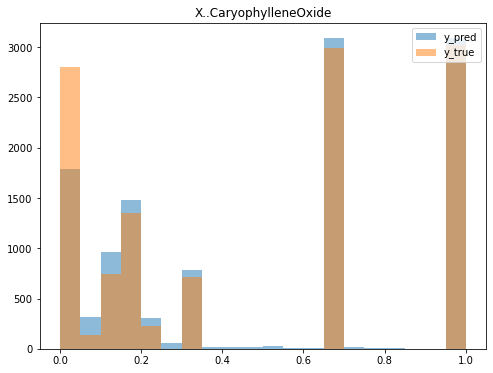

<Figure size 432x288 with 0 Axes>

In [60]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CaryophylleneOxide"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_bert_carox.png')

Pearson R (kNN)

In [61]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.954
P-value: 0.000


Predicting on the test set (RF)

In [62]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [63]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_bert_carox.pkl")
joblib.dump(y_test, "y_test_rfreg_bert_carox.pkl")

['y_test_rfreg_bert_carox.pkl']

In [64]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.031606865616048904

In [65]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.01308892798054826

In [66]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.11440685285658486

In [67]:
r2_score(y_test, y_pred_rfreg_test)

0.9146605815739488

Error analysis (RF)

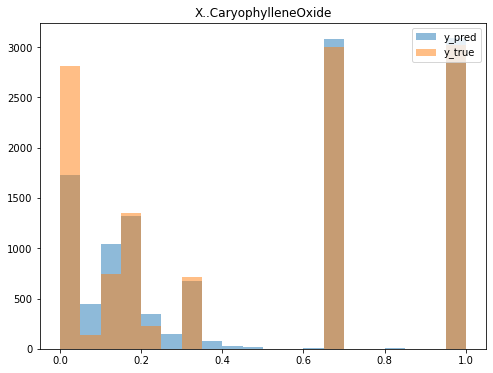

<Figure size 432x288 with 0 Axes>

In [68]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CaryophylleneOxide"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_bert_carox.png')

Pearson R (RF)

In [69]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.959
P-value: 0.000
